In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import datetime as dt
from operator import attrgetter

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import pandas as pd


csv_file_path = 'data.csv'


try:
    df = pd.read_csv(csv_file_path, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(csv_file_path, encoding='latin-1')

df.head()

,L,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [3]:
df.isnull().sum()

L                   0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
df = df.dropna(subset=['CustomerID'])

In [5]:
df.duplicated().sum()

5225

In [6]:
df = df.drop_duplicates()

In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [20]:
from datetime import datetime
import pandas as pd

# Assuming df is your DataFrame with columns 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', and 'Country'

present = datetime(2023, 11, 30)

# Recency
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
recency_df = (present - df.groupby('CustomerID')['InvoiceDate'].max()).dt.days

# Frequency and Monetary
frequency_df = df.groupby('CustomerID')['StockCode'].nunique()
monetary_df = df.groupby('CustomerID')['Quantity'].sum() * df.groupby('CustomerID')['UnitPrice'].mean()
rfm_df = pd.DataFrame({
    'CustomerID': recency_df.index,
    'Recency': recency_df.values,
    'Frequency': frequency_df.values,
    'Monetary': monetary_df.values,
})

rfm_df.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,4698,1,0.000000
1,12347.0,4375,103,6498.979011
2,12348.0,4448,22,13495.487419
3,12349.0,4391,73,5230.384932
4,12350.0,4683,17,756.711765


In [21]:
df1 = df[['CustomerID','InvoiceDate','Quantity','UnitPrice']]

In [22]:
df1

,CustomerID,InvoiceDate,Quantity,UnitPrice
0,17850.0,2010-12-01 08:26:00,6,2.55
1,17850.0,2010-12-01 08:26:00,6,3.39
2,17850.0,2010-12-01 08:26:00,8,2.75
3,17850.0,2010-12-01 08:26:00,6,3.39
4,17850.0,2010-12-01 08:26:00,6,3.39
...,...,...,...,...
541904,12680.0,2011-12-09 12:50:00,12,0.85
541905,12680.0,2011-12-09 12:50:00,6,2.10
541906,12680.0,2011-12-09 12:50:00,4,4.15
541907,12680.0,2011-12-09 12:50:00,4,4.15


Recency: 


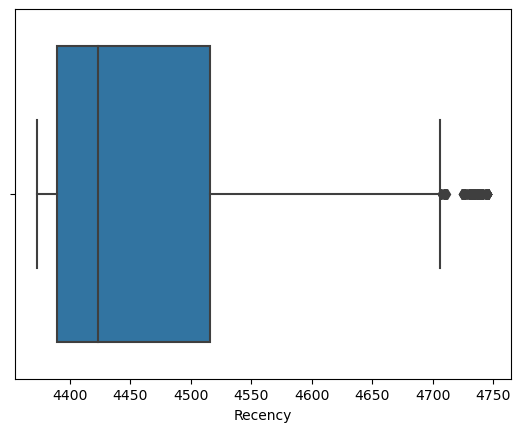

Frequency: 


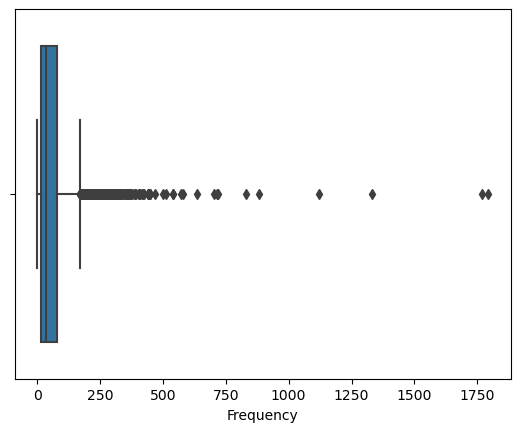

Monetary: 


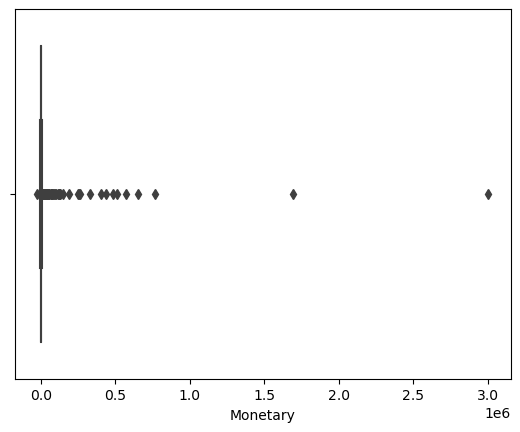

In [23]:
list1 = ['Recency','Frequency','Monetary']
for i in list1:
    print(str(i)+': ')
    ax = sns.boxplot(x=rfm_df[str(i)])
    plt.show()

In [24]:
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
    copy = data.copy()
    print("IQR value for column %s is: %s" % (col, IQR))
 
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    print(lower_range,upper_range)
    #np.where(condition, true, false)
    copy[col] = np.where(
    copy[col] > upper_range,
    upper_range,
    np.where(
        copy[col] < lower_range,
        lower_range,
        copy[col]
        )
    )

    return copy

In [25]:
final_recency = removeOutliers(rfm_df,'Recency')
final_frequency = removeOutliers(final_recency,'Frequency')
final_rfm_df = removeOutliers(final_frequency,'Monetary')

IQR value for column Recency is: 127.0
4198.5 4706.5
IQR value for column Frequency is: 62.0
-78.0 170.0
IQR value for column Monetary is: 2267.7856272910553
-2943.1617221865827 6127.980786977638


Recency before and after outlier capping using IQR


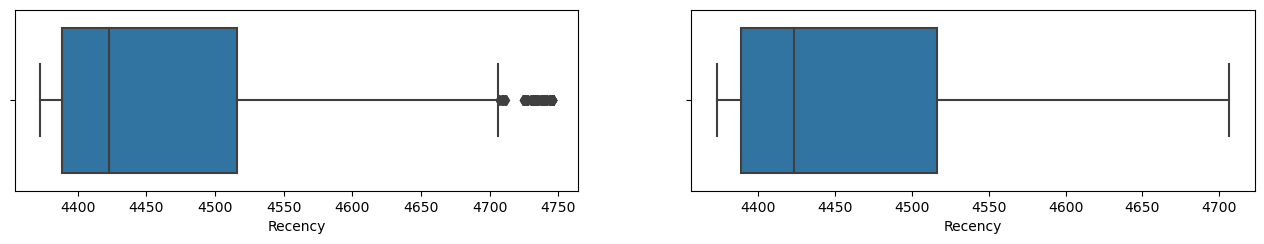

Frequency before and after outlier capping using IQR


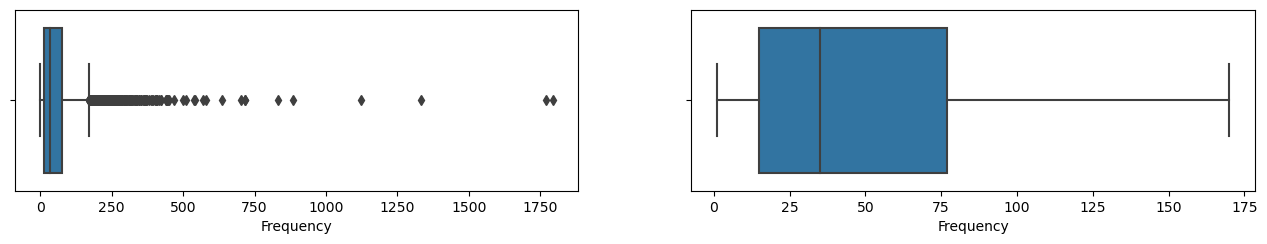

Monetary before and after outlier capping using IQR


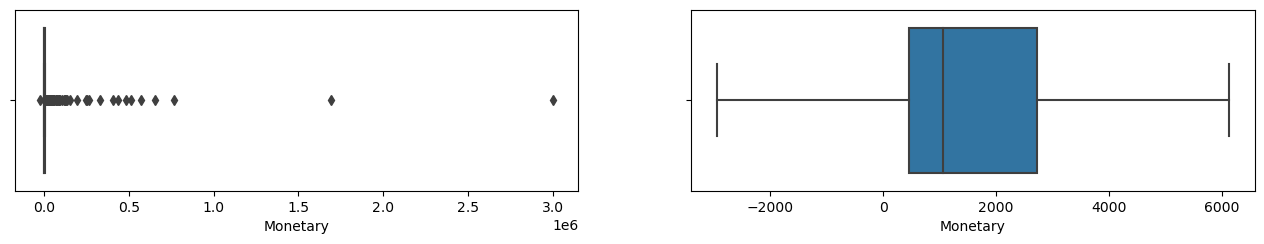

In [26]:
i = 1 
for col in ['Recency','Frequency','Monetary']:
    print(col+' before and after outlier capping using IQR')
    plt.figure(figsize=(16,8))
    plt.subplot(3,2,i)
    sns.boxplot(x=rfm_df[col])
    plt.subplot(3,2,i+1)
    sns.boxplot(x=final_rfm_df[col])
    ++i
    plt.show()

In [35]:
# Define function to assign quartile scores
def assign_quartile_score(value, quartiles):
    if value <= quartiles[0]:
        return 4
    elif value <= quartiles[1]:
        return 3
    elif value <= quartiles[2]:
        return 2
    else:
        return 1

# Calculate quartiles for each RFM metric
recency_quartiles = final_rfm_df['Recency'].quantile([0.25, 0.5, 0.75]).values
frequency_quartiles = final_rfm_df['Frequency'].quantile([0.25, 0.5, 0.75]).values
monetary_quartiles = final_rfm_df['Monetary'].quantile([0.25, 0.5, 0.75]).values

# Assign quartile scores to each customer
final_rfm_df['Recency_Score'] = final_rfm_df['Recency'].apply(assign_quartile_score, args=(recency_quartiles,))
final_rfm_df['Frequency_Score'] = final_rfm_df['Frequency'].apply(assign_quartile_score, args=(frequency_quartiles,))
final_rfm_df['Monetary_Score'] = final_rfm_df['Monetary'].apply(assign_quartile_score, args=(monetary_quartiles,))

# Combine the RFM scores into a single RFM score
final_rfm_df['RFM_Score'] = (
    final_rfm_df['Recency_Score'].astype(str) +
    final_rfm_df['Frequency_Score'].astype(str) +
    final_rfm_df['Monetary_Score'].astype(str)
)

# Append 'CustomerID' to the DataFrame
final_rfm_df['CustomerID'] = rfm_df.index

# Display the DataFrame with RFM scores and 'CustomerID'
print(final_rfm_df[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Recency_Score', 'Frequency_Score', 'Monetary_Score', 'RFM_Score']].head())

   CustomerID  Recency  Frequency     Monetary  Recency_Score  \
0           0   4698.0        1.0     0.000000              1   
1           1   4375.0      103.0  6127.980787              4   
2           2   4448.0       22.0  6127.980787              2   
3           3   4391.0       73.0  5230.384932              3   
4           4   4683.0       17.0   756.711765              1   

   Frequency_Score  Monetary_Score RFM_Score  
0                4               4       144  
1                1               1       411  
2                3               1       231  
3                2               1       321  
4                3               3       133  


In [36]:
display(final_rfm_df['RFM_Score'].unique())
print(final_rfm_df['RFM_Score'].nunique())

array(['144', '411', '231', '321', '133', '122', '143', '311', '442',
       '211', '233', '421', '131', '443', '322', '232', '332', '222',
       '111', '333', '313', '343', '121', '132', '432', '433', '244',
       '221', '422', '242', '331', '134', '323', '234', '223', '434',
       '441', '444', '344', '243', '214', '324', '412', '241', '431',
       '423', '213', '141', '142', '341', '224', '212', '312', '123',
       '334', '413', '342', '124', '314', '113', '424', '114', '112',
       '414'], dtype=object)

64


In [37]:
input_array = final_rfm_df['RFM_Score'].unique()
def sum_of_digits(number):
    return sum(int(digit) for digit in str(number))
rfm_total = [sum_of_digits(number) for number in input_array]
u = list(set(rfm_total))
print(u)

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [38]:
def sum_of_digits(number):
    return sum(int(digit) for digit in str(number))

final_rfm_df['RFM_Total'] = final_rfm_df['RFM_Score'].apply(sum_of_digits)
print(final_rfm_df[['RFM_Score', 'RFM_Total']].head())

  RFM_Score  RFM_Total
0       144          9
1       411          6
2       231          6
3       321          6
4       133          7


In [39]:
def classify_customer(df):
    if (df['RFM_Total'] == 3):
        return 'Top customers'   
    elif (df['RFM_Total'] == 4):
        return 'Best customers'
    elif (df['RFM_Total'] == 5):
            return "Good customers"
    elif (df['RFM_Total'] == 6):
            return "Promising customer"
    elif (df['RFM_Total'] == 7):
            return "Recent customer"
    elif (df['RFM_Total'] == 8):
            return "Customer needs attention"
    elif (df['RFM_Total'] == 9):
            return "Can't lose them"
    elif (df['RFM_Total'] == 10):
            return "Don't lose them" 
    elif (df['RFM_Total'] == 11):
            return "We lose them"    
    else:
        return "lost"

In [40]:
final_rfm_df['Customer_Segmentation'] = final_rfm_df.apply(classify_customer,axis=1)

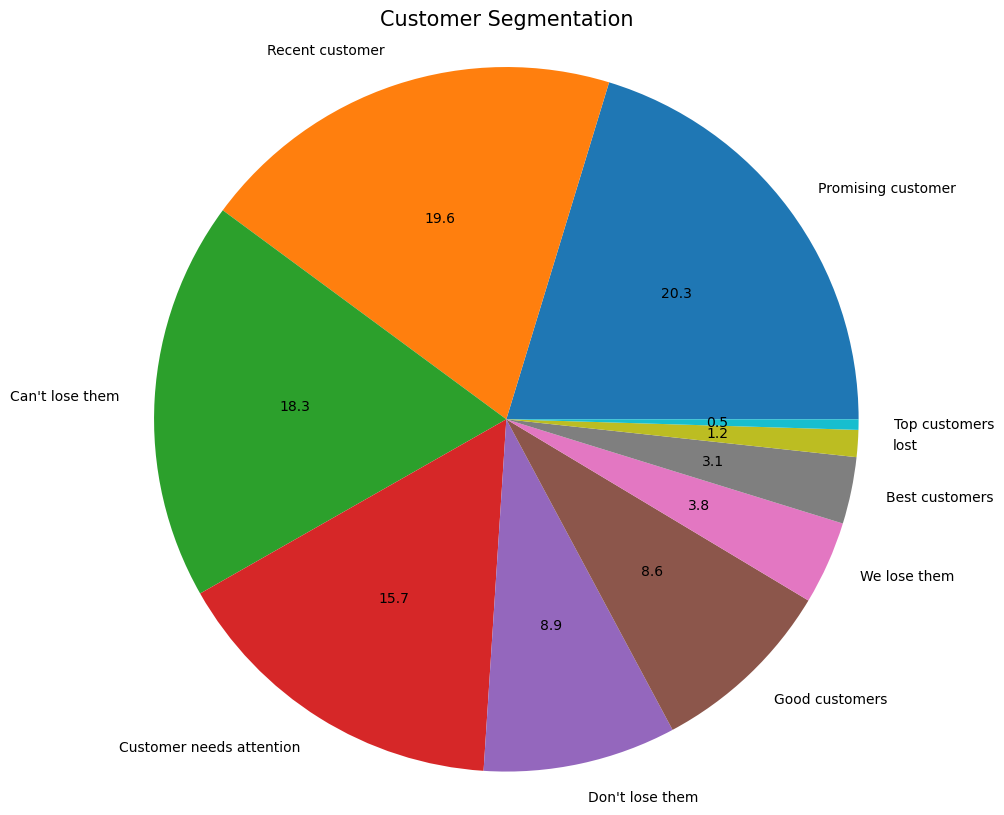

In [41]:
plt.figure(figsize=(10,10))
final_rfm_df['Customer_Segmentation'].value_counts().plot(kind='pie',autopct='%.1f')
plt.title("Customer Segmentation",size=15)
plt.ylabel(" ")
plt.axis('equal') 
plt.show()

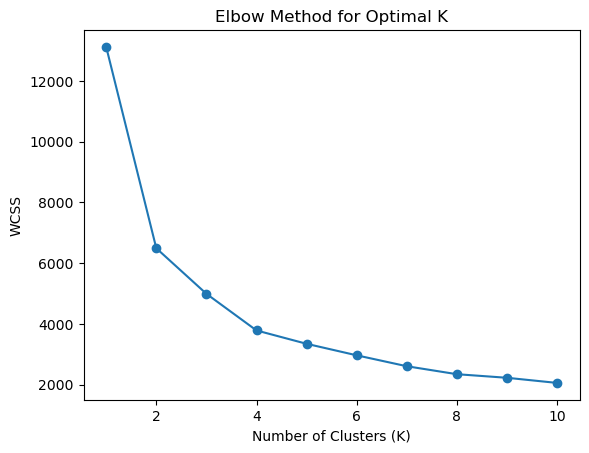

1    1829
2    1688
0     855
Name: Cluster, dtype: int64


In [42]:
rfm_for_clustering = final_rfm_df[['Recency_Score', 'Frequency_Score', 'Monetary_Score']]

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_for_clustering)


wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph to find the optimal number of clusters
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

optimal_k = 3

# Perform K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
final_rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)


print(final_rfm_df['Cluster'].value_counts())

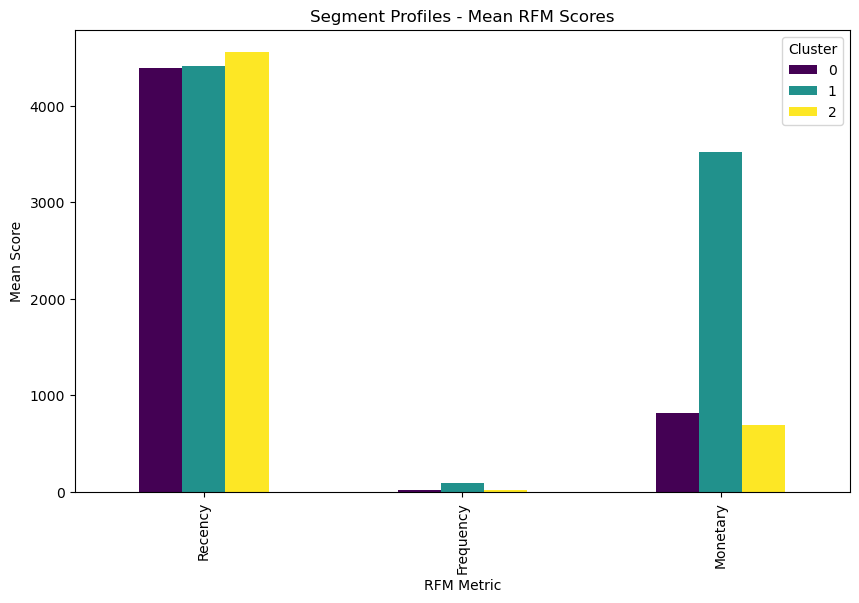

In [43]:
# Calculate mean RFM scores for each cluster
segment_profiles = final_rfm_df.groupby('Cluster')['Recency', 'Frequency', 'Monetary'].mean()

# Visualize the segment profiles
segment_profiles.T.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Segment Profiles - Mean RFM Scores')
plt.xlabel('RFM Metric')
plt.ylabel('Mean Score')
plt.show()

In [44]:
segment_profiles

,Recency,Frequency,Monetary
Cluster,,,
0,4395.580117,24.719298,816.632869
1,4409.613723,96.647895,3517.690330
2,4556.684834,21.162322,692.912479


In [47]:
segment_counts

1    1829
2    1688
0     855
Name: Cluster, dtype: int64

In [48]:
final_rfm_df

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,RFM_Total,Customer_Segmentation,Cluster
0,0,4698.0,1.0,0.000000,1,4,4,144,9,Can't lose them,2
1,1,4375.0,103.0,6127.980787,4,1,1,411,6,Promising customer,1
2,2,4448.0,22.0,6127.980787,2,3,1,231,6,Promising customer,1
3,3,4391.0,73.0,5230.384932,3,2,1,321,6,Promising customer,1
4,4,4683.0,17.0,756.711765,1,3,3,133,7,Recent customer,2
...,...,...,...,...,...,...,...,...,...,...,...
4367,4367,4650.0,10.0,214.425000,1,4,4,144,9,Can't lose them,2
4368,4368,4553.0,7.0,303.634286,1,4,4,144,9,Can't lose them,2
4369,4369,4380.0,12.0,472.510769,4,4,3,443,11,We lose them,0
4370,4370,4376.0,170.0,2210.216103,4,1,2,412,7,Recent customer,1


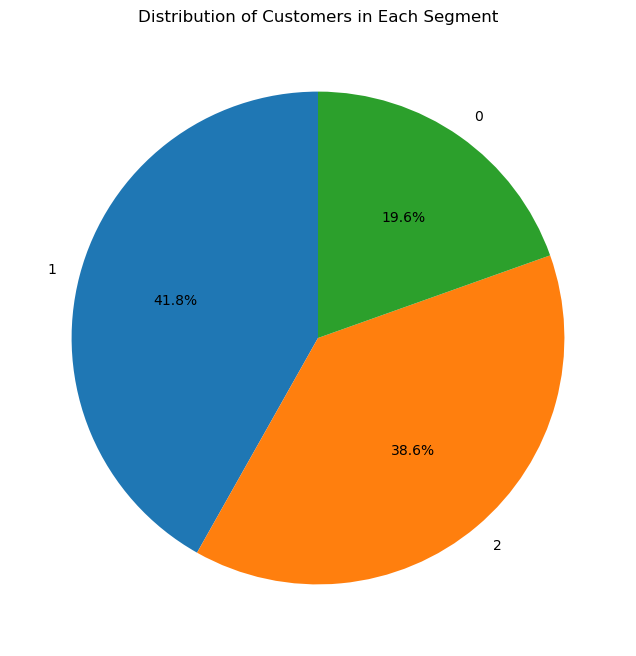

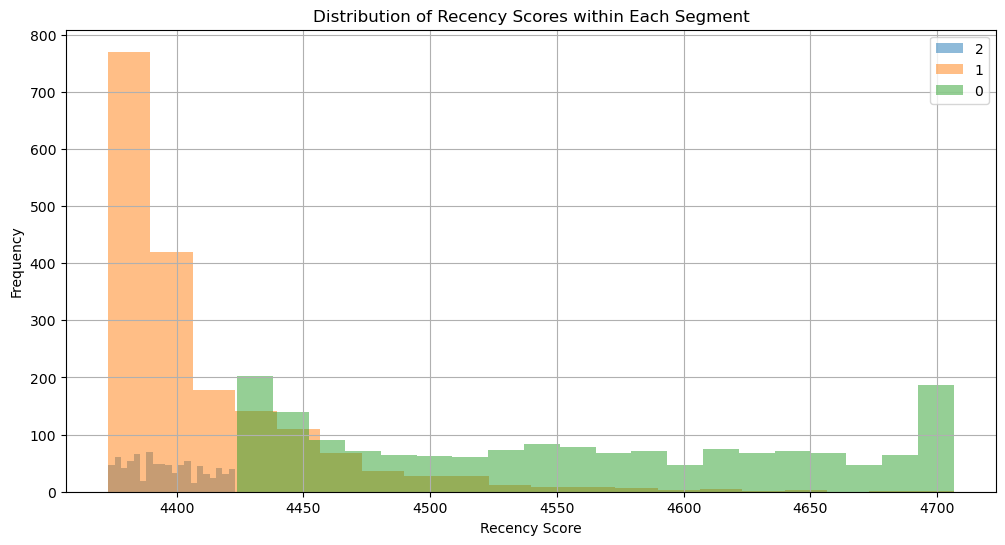

In [46]:
# Visualize the distribution of customers within each cluster
segment_counts = final_rfm_df['Cluster'].value_counts()
segment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8))
plt.title('Distribution of Customers in Each Segment')
plt.ylabel('')
plt.show()

# Histogram of RFM scores within each cluster
final_rfm_df.groupby('Cluster')['Recency'].hist(alpha=0.5, bins=20, figsize=(12, 6))
plt.title('Distribution of Recency Scores within Each Segment')
plt.xlabel('Recency Score')
plt.ylabel('Frequency')
plt.legend(final_rfm_df['Cluster'].unique())
plt.show()


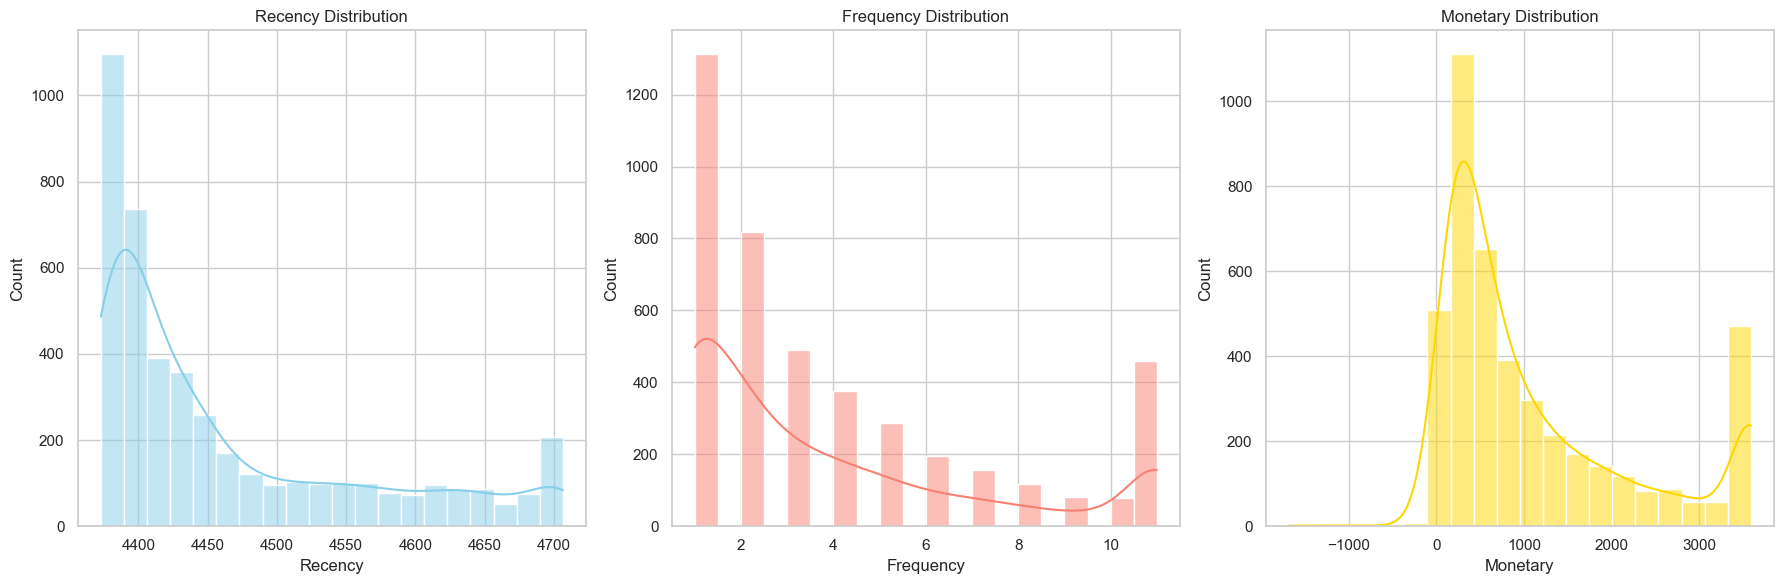

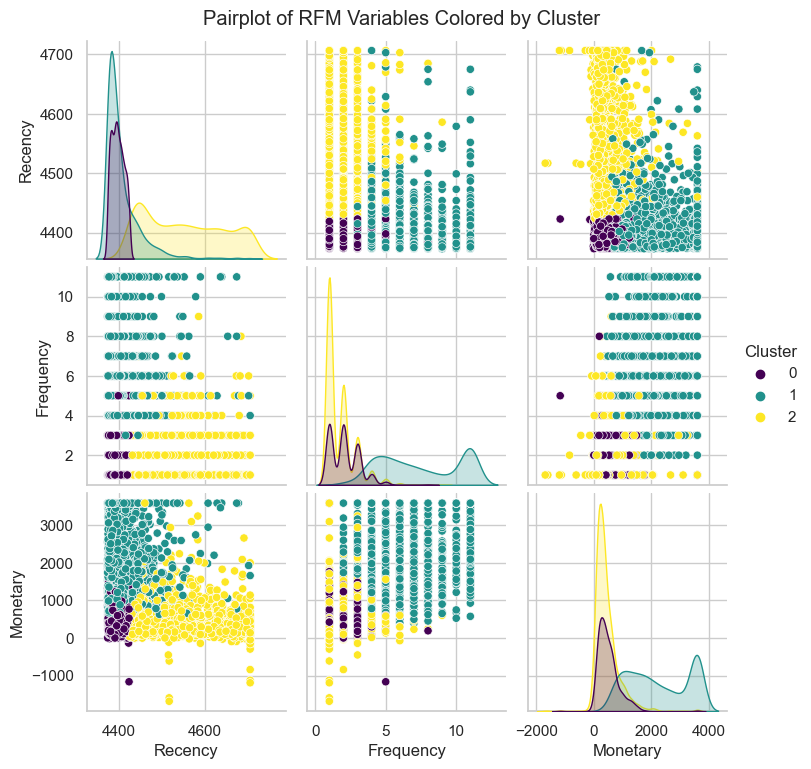

In [308]:
import seaborn as sns

# Plot RFM Distributions
plt.figure(figsize=(18, 6))

# Subplot for Recency
plt.subplot(1, 3, 1)
sns.histplot(final_rfm_df['Recency'], bins=20, kde=True, color='skyblue')
plt.title('Recency Distribution')

# Subplot for Frequency
plt.subplot(1, 3, 2)
sns.histplot(final_rfm_df['Frequency'], bins=20, kde=True, color='salmon')
plt.title('Frequency Distribution')

# Subplot for Monetary
plt.subplot(1, 3, 3)
sns.histplot(final_rfm_df['Monetary'], bins=20, kde=True, color='gold')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()


# Pairplot for RFM variables colored by cluster
sns.pairplot(final_rfm_df, vars=['Recency', 'Frequency', 'Monetary'], hue='Cluster', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot of RFM Variables Colored by Cluster', y=1.02)
plt.show()


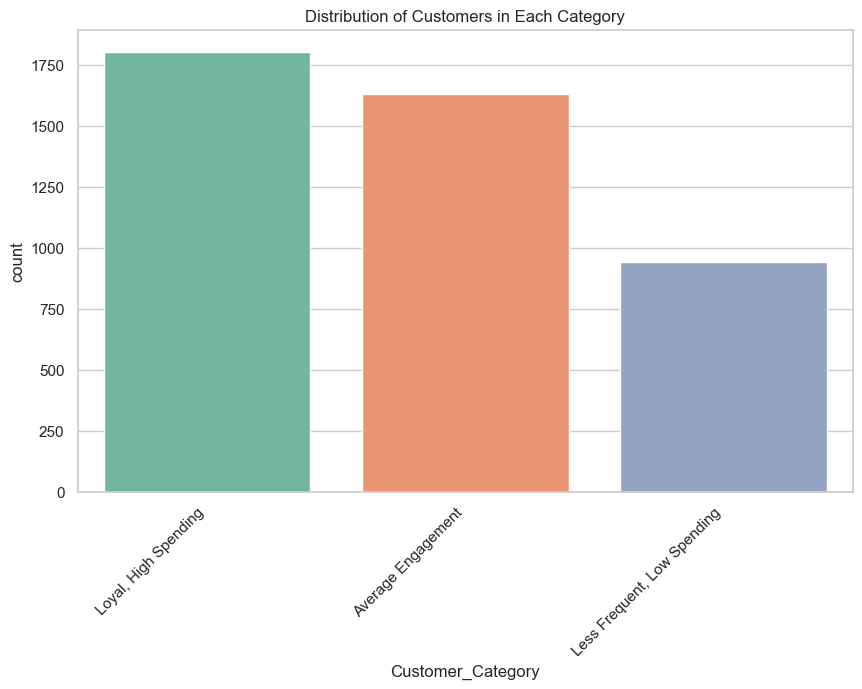

In [309]:
# Categorize customers based on their clusters
final_rfm_df['Customer_Category'] = final_rfm_df['Cluster'].map({
    0: 'Less Frequent, Low Spending',
    1: 'Average Engagement',
    2: 'Loyal, High Spending'
})

# Visualize the distribution of customers in each category
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer_Category', data=final_rfm_df, palette='Set2')
plt.title('Distribution of Customers in Each Category')
plt.xticks(rotation=45, ha='right')
plt.show()


## Recommendations

1. Less Often, Lower Expenditure  (Cluster 0):

Re-Engagement Campaigns: To remind clients about your goods and services, start focused re-engagement campaigns.
Exclusive Discounts: To encourage more regular purchases, offer exclusive discounts or promotions.
Product Suggestions: Present products that you think they might find interesting by making personalized product suggestions.


2. Average Engagement Customers ( Good Customers) (Cluster 1):

Loyalty Programs: Establish a loyalty program to reward sustained involvement and promote repeat business.
Cross-Sell Techniques: To raise average transaction values, find comparable products and use cross-selling techniques.
Customer surveys: Use them to get input and make improvements to any areas that may be impeding greater levels of involvement.

3. Loyal, High spending Customers (Loyal Customers) (Cluster 2):

VIP Programs: Upgrade their experience by providing early access, special benefits, and first-rate services through a VIP program.
Personalized Communication: Recognize their devotion and make suggestions for upscale products in marketing messages that are tailored to them with specific information.
Referral Programs: Use referral programs with alluring incentives to take advantage of their loyalty to bring in new clients.